# Looking for Exoplanets: Transit Method

## Table of Contents:
* **0.** Install Lightkurve  
* **1.** Import Dependancies  
* **2.** Downloading and Plotting Data from TIC IDs  
  * **2.1.** Formatting  
  * **2.2.** Plotting Multiple Sectors  
  * **2.3.** Binned and Unbinned Data  
  * **2.4.** Phase Folding  
* **3.** Properties of an Exoplanet  
  * **3.1** Size of an Exoplanet  
  * **3.2** Orbital Period  
  * **3.3** Comparison to Literature  
* **4.** False Positives  
  * **4.1** Background Flux  
* **5.** Extras  
  * **5.1** Box Least Squares Algorithm  
  * **5.2** Transit Timing Variations  

## 0 Install Lightkurve

`!pip install lightkurve`

## 1 Import Dependancies

In [1]:
import matplotlib.pyplot as plt
import lightkurve as lk
from astropy import units as u
import numpy as np
import ipywidgets as widgets

## 2 Downloading and Plotting Data from TIC IDs

First we define the Target, which is identified by this **T**est **I**nput **C**atalogue Identifier:

In [2]:
TIC = 'TIC 284475976'

Next we get our required data from this Identifier, lightkurve searches through to find the corresponding data for this TIC ID. We are using the **SPOC** Pipeline (preprocessing). This will list all the sectors this target has been found in:

In [3]:
total_sector_data = lk.search_lightcurve(TIC, author = 'SPOC')
total_sector_data

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,TESS Sector 23,2020,SPOC,120,284475976,0.0
1,TESS Sector 26,2020,SPOC,120,284475976,0.0
2,TESS Sector 40,2021,SPOC,120,284475976,0.0
3,TESS Sector 41,2021,SPOC,120,284475976,0.0


Let us look at a specific sector, sector $23$:

In [4]:
sector_data = lk.search_lightcurve(TIC, author = 'SPOC', sector = 23)
sector_data

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,TESS Sector 23,2020,SPOC,120,284475976,0.0


So far we have only searched for this data to see if it exists. We can download this data to plot it (the lightcurve) and manipulate it. By default, downloads are located in "*C:\\Users\\seani\\.lightkurve-cache*", or in whatever named user you use:

In [5]:
lc = sector_data.download()

<AxesSubplot:xlabel='Time - 2457000 [BTJD days]', ylabel='Flux [$\\mathrm{e^{-}\\,s^{-1}}$]'>

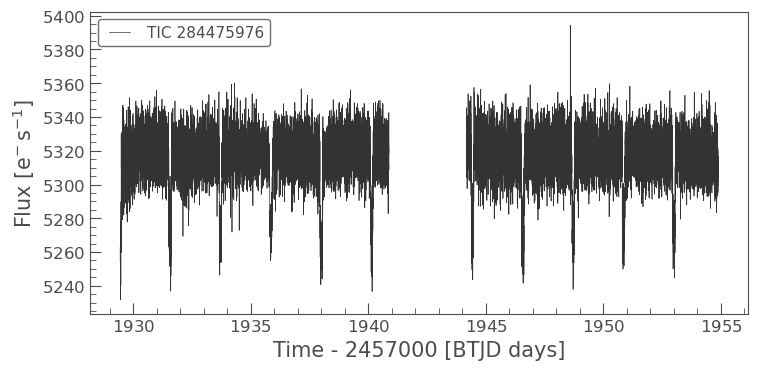

In [6]:
lc.plot()

TESS and other telescopes when searching for planets by the transit method collect light over a large portion of the sky (which is why we split these into sectors). This light is stored as a pixel file. We can collect and plot the pixel file data of this target from lightkurve. This will show us a particular sectors Flux over a pixel map. The cells highlighted in red are used to build up the lightcurve:

<AxesSubplot:title={'center':'Target ID: 284475976, Cadence: 504468'}, xlabel='Pixel Column Number', ylabel='Pixel Row Number'>

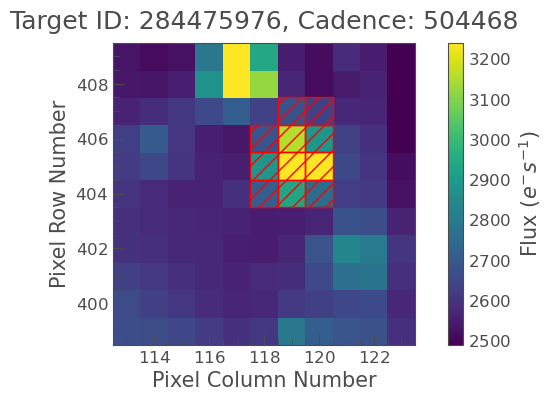

In [7]:
pixel_data = lk.search_targetpixelfile(TIC, author = 'SPOC', sector = 23) # SPOC is author name for TESS pipeline

pixel_map = pixel_data.download()
pixel_map.plot(aperture_mask = 'pipeline')

## 2.1 Formatting

For convenience, we can format the plots to transform them into an easier to understand form. The following changes the lined plot to a scatter-style plot:

`linewidth = 0, marker = '.'`

The following changes the **color** of the data and **alpha** (transparency) of each point:

`color = 'green', alpha = 0.3`

<AxesSubplot:xlabel='Time - 2457000 [BTJD days]', ylabel='Flux [$\\mathrm{e^{-}\\,s^{-1}}$]'>

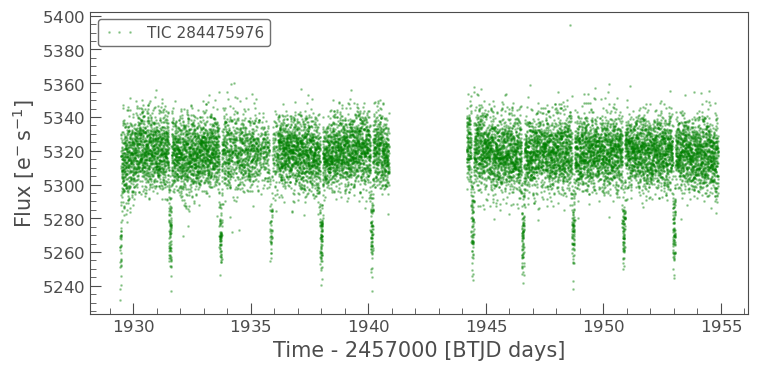

In [8]:
lc.plot(linewidth = 0, marker = '.', color = 'green', alpha = 0.3)

## 2.2 Plotting Multiple Sectors

Often we would like to observe the one target in multiple sectors. A target can appear in multiple sectors as TESS rotates around and the target moves, with overlapping occuring. Let us look at a different Target:

In [9]:
TIC = 'TIC 55525572'

total_sector_data = lk.search_lightcurve(TIC, author = 'SPOC')
total_sector_data

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,TESS Sector 04,2018,SPOC,120,55525572,0.0
1,TESS Sector 05,2018,SPOC,120,55525572,0.0
2,TESS Sector 06,2018,SPOC,120,55525572,0.0
3,TESS Sector 08,2019,SPOC,120,55525572,0.0
4,TESS Sector 09,2019,SPOC,120,55525572,0.0
5,TESS Sector 10,2019,SPOC,120,55525572,0.0
6,TESS Sector 11,2019,SPOC,120,55525572,0.0
7,TESS Sector 12,2019,SPOC,120,55525572,0.0
8,TESS Sector 13,2019,SPOC,120,55525572,0.0


Let us take the first 4 sectors. We can download similar to before however we must specify:

`.download_all()`

We will also plot these on the same graph similar to before:

<AxesSubplot:xlabel='Time - 2457000 [BTJD days]', ylabel='Flux [$\\mathrm{e^{-}\\,s^{-1}}$]'>

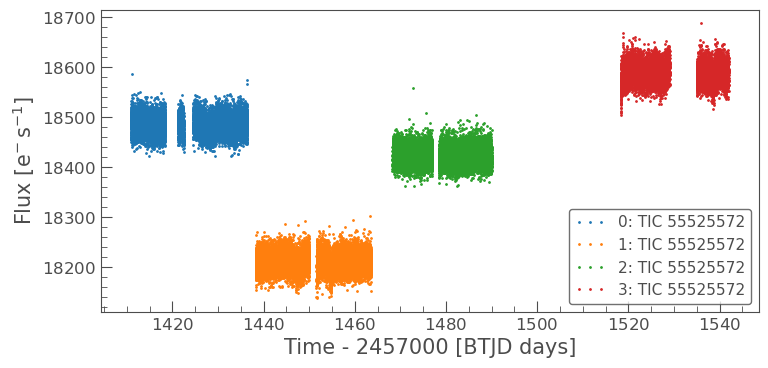

In [10]:
selected_sector_data = total_sector_data[0:4]

lc_collection = selected_sector_data.download_all()

lc_collection.plot(linewidth = 0, marker = '.')

We can see that each of these lightcurves fluctuate in *Flux*. We can normalise these by *stitching* them together, which will align them all around the same point:

<AxesSubplot:xlabel='Time - 2457000 [BTJD days]', ylabel='Normalized Flux'>

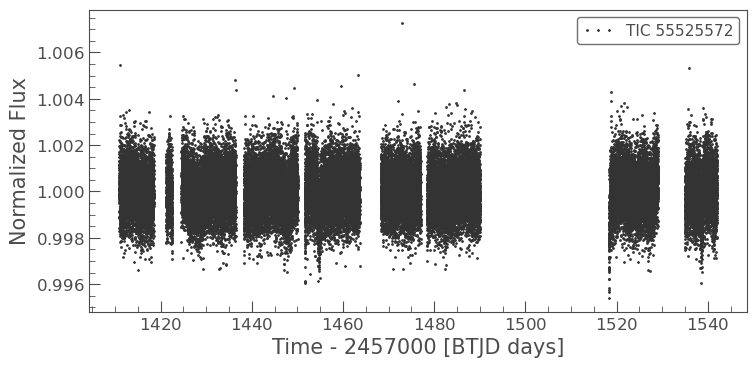

In [11]:
lc_collection_stitched = lc_collection.stitch()

lc_collection_stitched.plot(linewidth = 0, marker = '.')

## 2.3 Binned and Unbinned Data

Binning is the action of *downsampling* the data, i.e we average some data points with their surrounding neighbours and remove these neighbours. This helps to reduce the effect of noise. We do this by chopping the data up into a series of *bins*, seperated by their *bin-width*. We then average all the points that fall into each bin.

For this demonstration, we will be binning by Time. So we will chop the time-axis (x-axis) with a series of vertical lines that are each seperated by a particular bin-width.

It is important to note that while greater bin-widths reduce the effect of noise, they can also reduce our resolution. Smaller bin-widths refine our resolution, but increase our uncertainty due to noise. Thus, we must try to balance these.

We first need to define our bin width and then use the inbuilt `.bin()` command to bin the data:

In [12]:
bin_time = 15 / (24 * 60) # a bin time of 15 minutes

lc_collection_binned = lc_collection_stitched.bin(bin_time) # must use stitched data

Let's now plot the binned and unbinned data together to see the differences:

<AxesSubplot:xlabel='Time - 2457000 [BTJD days]', ylabel='Normalized Flux'>

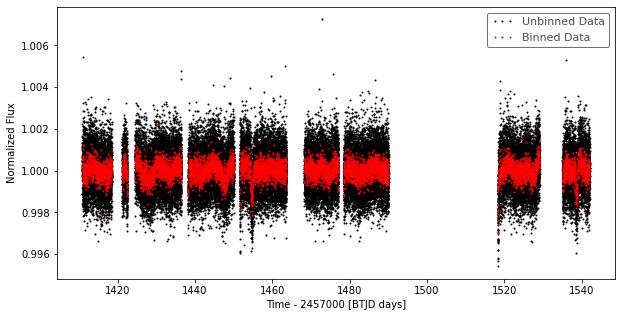

In [13]:
fig, ax = plt.subplots(figsize = (10, 5))

lc_collection_stitched.plot(ax = ax, linewidth = 0, marker = 'o', markersize = 1, color = 'black', label = "Unbinned Data")
lc_collection_binned.plot(ax = ax, linewidth = 0, marker = 'o', markersize = 1, color = 'red', label = "Binned Data")

## 2.4 Phase Folding

Phase Folding allows us to find the period $P$ of transits. We chop the data up in regular intervals to give us segments. This chopping is determined by the current guess of the period. By phase folding, we are folding each segment (phase) of the data on top of one another. If all of the dips in the data lie exactly on top of one another, we have determined the correct period.

Let us use the same target as before, but now use $9$ different sectors:

<AxesSubplot:xlabel='Time - 2457000 [BTJD days]', ylabel='Normalized Flux'>

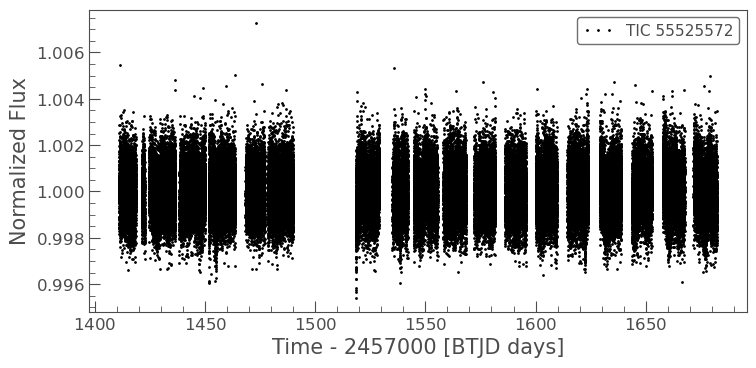

In [14]:
selected_sector_data = total_sector_data[0:9]

lc_collection = selected_sector_data.download_all().stitch() # download and stitch all

lc_collection.plot(linewidth = 0, marker = '.', color = 'black')

To start phase folding, we need to determine the first transit of our data set, and the time this takes place $t_0$ (known as the *epoch-time*). We also need to make an initial guess for the period:

In [15]:
# actual values already known for this exoplanet
period = 83.8979
t0 = 2125.847

We can now use the inbuilt `.fold()` command, to automatically perform the phase fold. Note that *epoch_time* is our $t_0$:

<AxesSubplot:xlabel='Phase [JD]', ylabel='Normalized Flux'>

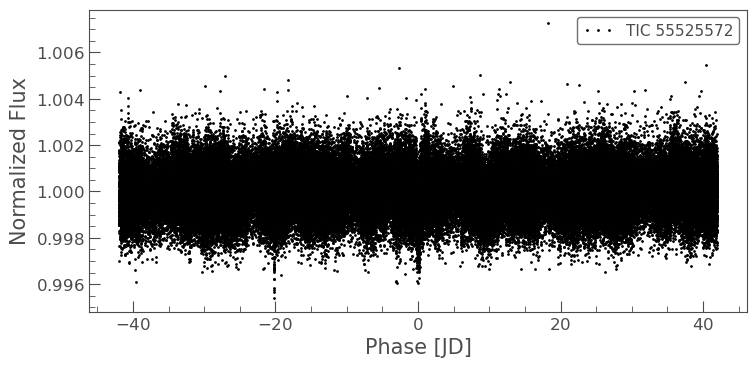

In [16]:
lc_phased = lc_collection.fold(period = period, epoch_time = t0)

lc_phased.plot(linewidth = 0, marker = '.', color = 'black')

This is clearly not very readable, we can improve the quality of this by binning the data as before:

(0.996, 1.004)

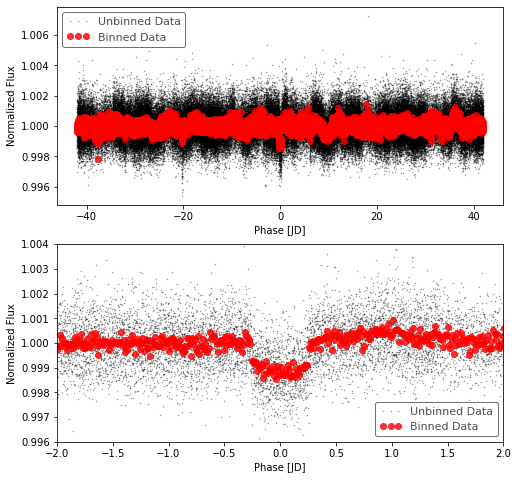

In [17]:
# Binning
bin_time = 15 / (24 * 60)

lc_phased_binned = lc_phased.bin(bin_time)

# Plotting
fig, (ax1, ax2) = plt.subplots(2, figsize = (8, 8))

lc_phased.plot(ax = ax1, linewidth = 0, marker = '.', markersize = 1, alpha = 0.4, color = 'black', label = "Unbinned Data")
lc_phased_binned.plot(ax = ax1, linewidth = 0, marker = 'o', markersize = 6, alpha = 0.8, color = 'red', label = "Binned Data")

# Zoomed-in plot
lc_phased.plot(ax = ax2, linewidth = 0, marker = '.', markersize = 1, alpha = 0.4, color = 'black', label = "Unbinned Data")
lc_phased_binned.plot(ax = ax2, linewidth = 0, marker = 'o', markersize = 6, alpha = 0.8, color = 'red', label = "Binned Data")

ax2.set_xlim(-2, 2) # limit x-axis to zoom in on data
ax2.set_ylim(0.996, 1.004) # limit y-axis to zoom in on data

The following is what happens when you use the incorrect period:

(0.996, 1.004)

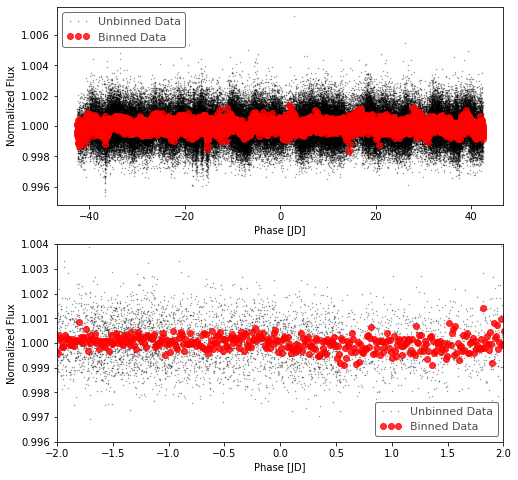

In [18]:
# guessed values
period_wrong = 85
t0_wrong = 2150

# Phase Folding
lc_phased_wrong = lc_collection.fold(period = period_wrong, epoch_time = t0_wrong)

# Binning
bin_time = 15 / (24 * 60)

lc_phased_binned_wrong = lc_phased_wrong.bin(bin_time)

# Plotting
fig, (ax1, ax2) = plt.subplots(2, figsize = (8, 8))

lc_phased_wrong.plot(ax = ax1, linewidth = 0, marker = '.', markersize = 1, alpha = 0.4, color = 'black', label = "Unbinned Data")
lc_phased_binned_wrong.plot(ax = ax1, linewidth = 0, marker = 'o', markersize = 6, alpha = 0.8, color = 'red', label = "Binned Data")

# Zoomed-in plot
lc_phased_wrong.plot(ax = ax2, linewidth = 0, marker = '.', markersize = 1, alpha = 0.4, color = 'black', label = "Unbinned Data")
lc_phased_binned_wrong.plot(ax = ax2, linewidth = 0, marker = 'o', markersize = 6, alpha = 0.8, color = 'red', label = "Binned Data")

ax2.set_xlim(-2, 2) # limit x-axis to zoom in on data
ax2.set_ylim(0.996, 1.004) # limit y-axis to zoom in on data

# 3 Properties of an Exoplanet

We will be referring to the following picture often in this section:

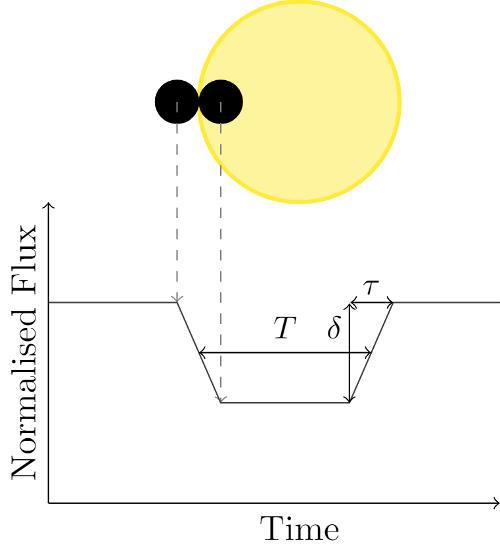

where:  
 > $T$ is the transit duration  
   $\tau$ is the ingress / egress duration  
   $\delta$ is the normalised change in Flux  

For now we will ignore the impact parameter $b$ although important for inclination, $i$.

## 3.1 Size of an Exoplanet

We calculate the radius of an exoplanet (assuming spherical exoplanet) theoretically by first understanding that the change in flux is proportional to the ratio of the areas of the star and planet, i.e the bigger the dip in brightness, the larger the area of the planet compared to the star. We call this "dip" the *transit depth*, and is given by the following:

$$ \delta \equiv \frac{\Delta F}{F} $$

where:  
 > $F$ is the Flux observed  
   $\Delta F$ is the change in Flux observed  
   $\delta$ is the normalised change in Flux  

We can then assume the area of the star and planet are given by $A = \pi R_{object}^2$, since $\delta$ is the ratio of these we get:

$$ \delta = \frac{R_{p}^2}{R_{*}^2} $$

$$ \Rightarrow R_{p} = R_{*} \sqrt{\delta} $$

where:  
 > $R_{p}$ is the radius of the planet  
   $R_{*}$ is the radius of the star  

Let us use the same target as before. We must first begin by determining the transit depth $\delta$, we do this by estimation for now. Let's draw a horizontal line at where we can best determine the dip lies from before:

(0.996, 1.004)

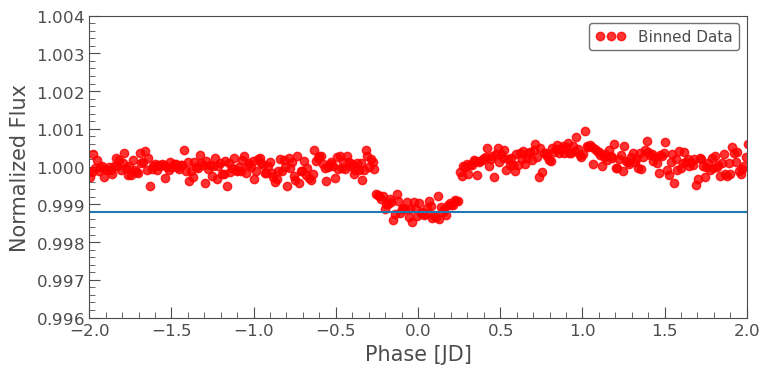

In [19]:
# Zoomed-in plot with horizontal line
lc_phased_binned.plot(linewidth = 0, marker = 'o', markersize = 6, alpha = 0.8, color = 'red', label = "Binned Data")

plt.axhline(0.9988)
plt.xlim(-2, 2) # limit x-axis to zoom in on data
plt.ylim(0.996, 1.004) # limit y-axis to zoom in on data

Thus we have determined that the dip takes place at $y = 0.9988$. Since the data is normalised around $1$, we have:

$$ \delta = 1 - y $$

To calculate this in the code, let us use *astropy* for units and *numpy* for the square-root. We are taking the radius of the star as given, at $R_{*} = 2.04354 R_{\odot}$:

In [20]:
y = 0.9988
delta = 1 - y

R_star = 2.04354 * u.Rsun # solar radii from astropy

R_pl_sol = np.sqrt(delta) * R_star # formula from above, planet radius in solar radii
R_pl_sol

<Quantity 0.0707903 solRad>

We can use astropy to convert to earth radii ($R_{\bigoplus}$) and also metres ($m$):

In [21]:
R_pl_earth = R_pl_sol.to(u.Rearth)
R_pl_earth

<Quantity 7.72154924 earthRad>

In [22]:
R_pl = R_pl_earth.to(u.m)
R_pl

<Quantity 49248813.20296208 m>

## 3.2 Orbital Period

We have already shown that we can use phase folding to determine the orbital period of an exoplanet, but how do we arrive at this refined guess? Quite simply, we look at the time difference between two transits. This difference is our period $P$, and we can slightly alter our value until the transit events line up when phase folding.

Let us use a new target. We must import and plot the data as before, but we will not bin the data for convenience. Also note that we have plotted each time period in differenet

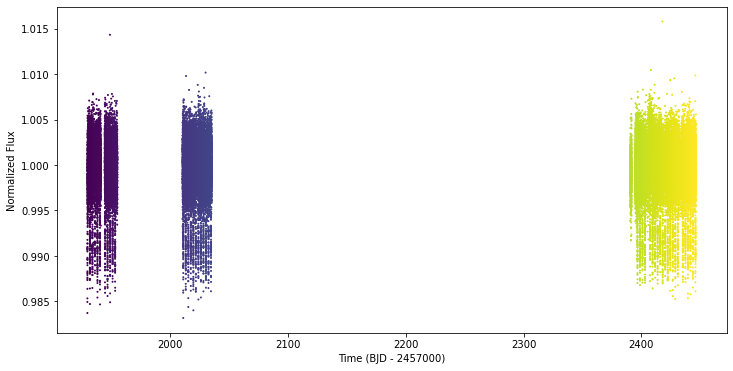

In [23]:
# Finding target data
TIC = 'TIC 284475976'

total_sector_data = lk.search_lightcurve(TIC, author = 'SPOC')
lc_collection = total_sector_data.download_all().stitch() # downloaded and stitched

# Plotting
fig, ax = plt.subplots(figsize=(12, 6))
plt.scatter(lc_collection.time.value, lc_collection.flux.value, c = lc_collection.time.value, s = 1) # c is list of colors

plt.xlabel("Time (BJD - 2457000)")
plt.ylabel("Normalized Flux")
plt.show()

Let's now zoom in on two transit events:

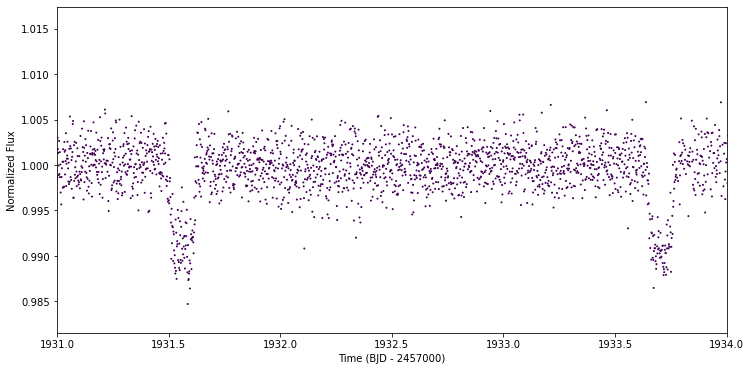

In [24]:
# Plotting
fig, ax = plt.subplots(figsize=(12, 6))
plt.scatter(lc_collection.time.value, lc_collection.flux.value, c = lc_collection.time.value, s = 1) # c is list of colors

plt.xlim(1931, 1934) # zooming in between 1931 and 1934
plt.xlabel("Time (BJD - 2457000)")
plt.ylabel("Normalized Flux")
plt.show()

We can thus make an intitial guess that the period is between $1931.5$ and $1934$:

In [25]:
transit1 = 1931.5
transit2 = 1934

period = transit2 - transit1
print(f"Period: {period} days.")

Period: 2.5 days.


Let us compute the phase folding for this:

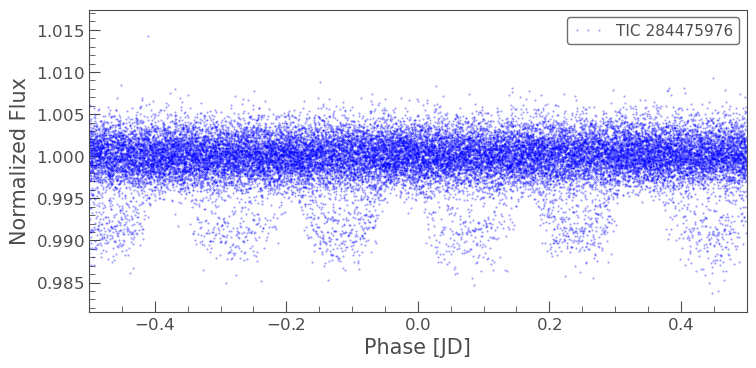

In [26]:
#Phase folding
period = 2.5
lc_phased = lc_collection.fold(period = period, epoch_time = transit1)

# Plotting
lc_phased.plot(linewidth = 0, marker = '.', markersize = 1, alpha = 0.4, color = 'blue')

plt.xlim(-0.5, 0.5) # zooming in
plt.show()

If we refine this by guesswork we can find that this period lies between $2.14$ and $2.15$. We can use a slider to refine this even further:

*Tip: use the arrow keys on the slider to finely tune the value*

In [27]:
# define a function to plot the phase folded curve with differing colors to better tell the difference
def plot_phase_folded_color(period):
    # phase fold the light curve
    lc_phased = lc_collection.fold(period = period, epoch_time = transit1)
    
    # Plotting
    fig, ax = plt.subplots(figsize = (12,6))
    plt.scatter(lc_phased.time.value, lc_phased.flux.value, c = lc_phased.time_original.value, s = 1)
    
    plt.xlabel("Phase")
    plt.ylabel("Normalized flux")
    plt.show()

# create interactive slider with max at 2.15 and minimum at 2.14 that changes the period inputted into the above function
widgets.interact(plot_phase_folded_color, period = widgets.FloatSlider(value = 2.145, min = 2.14, max = 2.15, step = 0.0001, description = 'period:', readout_format = '.4f'))

interactive(children=(FloatSlider(value=2.145, description='period:', max=2.15, min=2.14, readout_format='.4f'…

<function __main__.plot_phase_folded_color(period)>

From this, we have refined our estimate of the orbital period to $P = 2.1436$ days.

## 3.3 Comparison to Literature

From SIMBAD, *TIC 55525572* has been identified as Star **CD-61 970**, with confirmed orbiting exoplanet **CD-61 970b**. This exoplanet has a calculated radius of $6.71 \pm 0.38 R_{\bigoplus}$, from exoFOP. The Radius we calculated is slightly incorrect as the actual is derived through detailed modelling of the transit shapes.

**Sources:**  
> *SIMBAD: http://simbad.u-strasbg.fr/simbad/sim-basic?Ident=TIC+55525572&submit=SIMBAD+search*  
*exoFOP: https://exofop.ipac.caltech.edu/tess/target.php?id=55525572*  

From SIMBAD, *TIC 284475976* has been identified as Star **WASP-48**, with confirmed orbiting exoplanet **WASP-48b**. This exoplanet has a calculated orbital period of $2.14363 \pm 0.000003$ days, from exoFOP. This is almost exactly as we predicted.

**Sources:**  
> *SIMBAD: http://simbad.u-strasbg.fr/simbad/sim-basic?Ident=TIC+284475976&submit=SIMBAD+search*  
*exoFOP: https://exofop.ipac.caltech.edu/tess/target.php?id=284475976*  

# 4 False Positives

So far we have discussed how identifying dips in the brightness of a star can indicate an exoplanet. But how can we confirm that we are indeed looking at an exoplanet and not something else?

When we misidentify an exoplanet as such, we call this a *false positive*. There are numerous methods to rule out false positives and we will discuss them in this section.

## 4.1 Background Flux

Remeber before when we plotted the pixel map, we said that the lightcurve produced is taken from the pixels highlighted in red, as below:

<AxesSubplot:title={'center':'Target ID: 55525572, Cadence: 151577'}, xlabel='Pixel Column Number', ylabel='Pixel Row Number'>

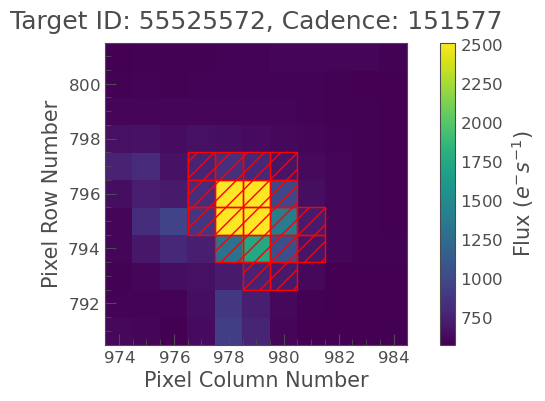

In [28]:
# Identify target and get pixel data
TIC = 'TIC 55525572'

pixel_data = lk.search_targetpixelfile(TIC, author = 'SPOC', sector = 5) # SPOC is author name for TESS pipeline

pixel_map = pixel_data.download()

# Plotting
pixel_map.plot(aperture_mask = 'pipeline')

We call the flux of the pixels surrounding those highlighted in red the *background flux*. We can plot it as so:

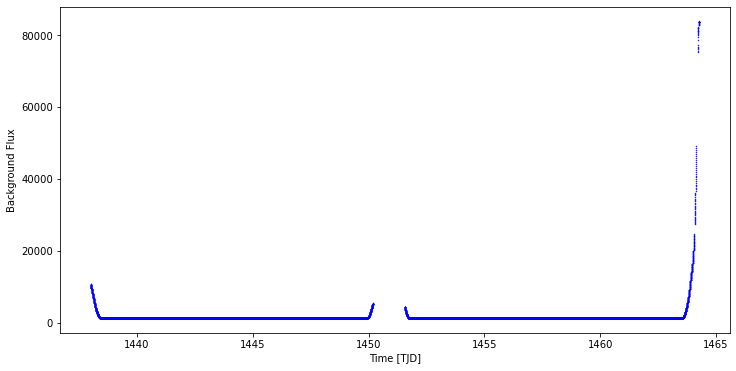

In [29]:
# Get lightcurve data
sector_data = lk.search_lightcurve(TIC, author = 'SPOC', sector = 5)

lc = sector_data.download()

# Plotting
fig, ax  = plt.subplots(figsize = (12, 6))

plt.plot(lc.time.value, lc.sap_bkg.value, color = 'blue', lw = 0, marker = '.', ms = 1)

plt.xlabel("Time [TJD]")
plt.ylabel("Background Flux")
plt.show()

This shows how the background flux changes throughout the whole time taken, with large differences. However, we are only interested in the background flux at the time of transit. This can be determined by the user, but for the sake of this demonstration we take it as known at $1454.7$ days. Let us plot the Flux of the red highlighted cells in black, and the background flux in blue:

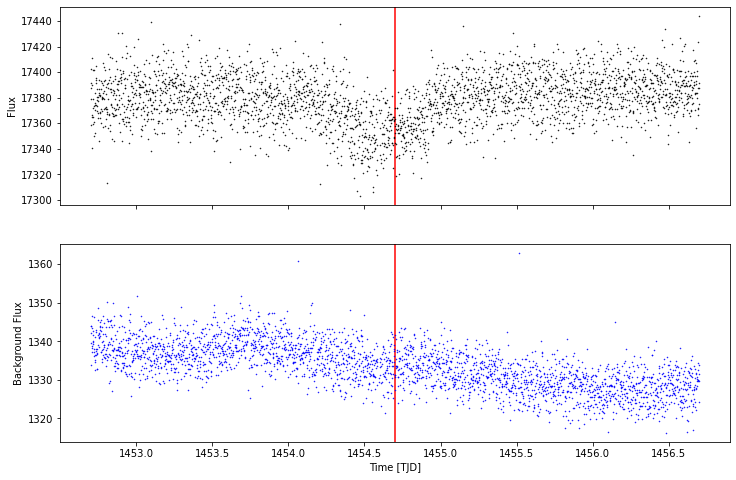

In [30]:
# Transit Time
transit_time = 1454.7

# generate a mask so we only see the times around the transit event 
# a numpy array of length time, a given element is True if that time is near transit time, False otherwise
transit_mask = (lc.time.value > transit_time - 2) & (lc.time.value < transit_time + 2)

# Plotting
fig, (ax1, ax2)  = plt.subplots(2, figsize = (12, 8), sharex = True) # sharex means there is only one labeled x-axis

ax1.plot(lc.time.value[transit_mask], lc.sap_flux.value[transit_mask], color = 'black', lw = 0, marker = '.', ms = 1)
ax2.plot(lc.time.value[transit_mask], lc.sap_bkg.value[transit_mask], color = 'blue', lw = 0, marker = '.', ms = 1)

ax1.axvline(transit_time, color = "red", zorder = -1) # a vertical line at the transit time
ax2.axvline(transit_time, color = "red", zorder = -1) # zorder means its displayed behind the points

ax1.set_ylabel("Flux")
ax2.set_xlabel("Time [TJD]")
ax2.set_ylabel("Background Flux")

plt.show()

We can see from the above that the background flux is fairly stable throughout, without spikes or dips. This means that the dip in the Flux is not caused by the background, and so this is a good candidate for an exoplanet. Reasons why there might be a spike in the background flux is for example due to an asteroid passing through the field of view.

Let's look at a bad candidate, which has a dip in Flux we would expect for a transit event. This we will see is a false positive as there is a spike in the background flux:

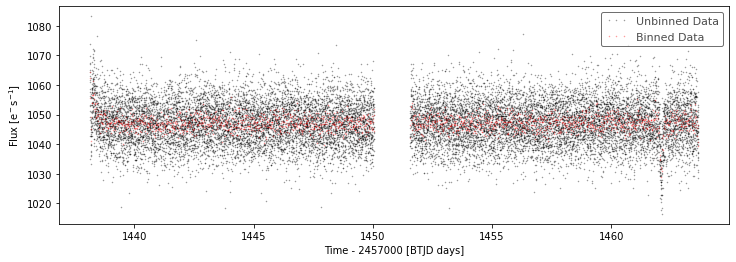

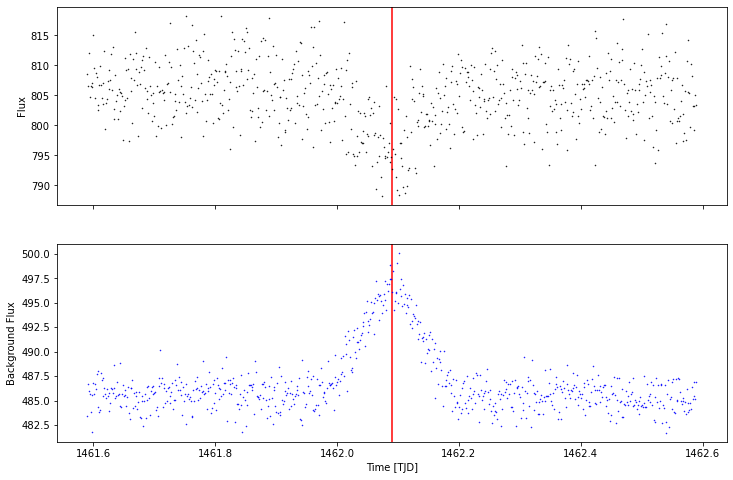

In [31]:
# Identify target
TIC = 'TIC 169483267'

# Get lightcurve data
sector_data = lk.search_lightcurve(TIC, author = 'SPOC', sector = 5)

lc = sector_data.download()

# Plotting
fig, ax  = plt.subplots(figsize = (12, 4))

lc.plot(ax = ax, color = 'black', lw = 0, marker = '.', ms = 1, alpha = 0.4, label = "Unbinned Data")
lc.bin(20 / (24 * 60)).plot(ax = ax, color = 'red', lw = 0, marker = '.', ms = 1, alpha = 0.4, label = "Binned Data")

# Flux and Background flux around Transit
# Transit Time
transit_time = 1462.09

# generate a mask so we only see the times around the transit event 
# a numpy array of length time, a given element is True if that time is near transit time, False otherwise
transit_mask = (lc.time.value > transit_time - 0.5) & (lc.time.value < transit_time + 0.5)

# Plotting
fig, (ax1, ax2)  = plt.subplots(2, figsize = (12, 8), sharex = True) # sharex means there is only one labeled x-axis

ax1.plot(lc.time.value[transit_mask], lc.sap_flux.value[transit_mask], color = 'black', lw = 0, marker = '.', ms = 1)
ax2.plot(lc.time.value[transit_mask], lc.sap_bkg.value[transit_mask], color = 'blue', lw = 0, marker = '.', ms = 1)

ax1.axvline(transit_time, color = "red", zorder = -1) # a vertical line at the transit time
ax2.axvline(transit_time, color = "red", zorder = -1) # zorder means its displayed behind the points

ax1.set_ylabel("Flux")
ax2.set_xlabel("Time [TJD]")
ax2.set_ylabel("Background Flux")

plt.show()

# 5 Extras

## 5.1 Box Least Squares Algorithm

The Box Least Squares Algorithm (BLS) is an algorithm used to automatically identify an exoplanet. It uses the same method we had done for determining the period by phase folding. The algorithm we automatically adjust the period until the error between each transit is below a tolerance.

## 5.2 Transit Timing Variations

Transit Timing Variations (TTV) is a method used for detecting exoplanets by observing variations in the timing of a transit. This can only be done after identifying *atleast one* exoplanet, so TTV allows us to find additional exoplanets in a system. By carefully observing how the transits occur at slightly later or slightly earlier times than expected, we can deduce that there must be another object (exoplanet) in the system. A video demonstrating this phenomenon uploaded by NASA can be found at:

> Transit Timing Variations https://www.youtube.com/watch?v=rqQ1xKsNIQE&ab_channel=NASAVideo

Since this effect is due to the gravitational pull of another exoplanet, we can thus infer the mass of an exoplanet if we can use TTV. However, this difference in timings is very small (on the order of 5 minutes across 300 days in **Kepler-19b**!). As such, we will not be taking this any further.

*Note: It is more common to use a similar method Eclipse Timing Variations (ETV) to detect additional stars in multi-star systems as the effect is magnified.*